# Airy Wave Functions

In classical mechanics, one of the simplest physical problems to work with (and, indeed, one of the first that students come across in their studies) is that of a particle in a uniform force field, e.g. a ball bouncing elastically on the ground. In quantum mechanics, however, this scenario is not encountered until much later, if at all, due to the fact that the solutions to the Schr&ouml;dinger equation for the same potential are unfamiliar, transcendental functions.

The Schr&ouml;dinger equation for a quantum bouncing ball is

\\[
-\frac{\hbar^2}{2m}\, \frac{d^2\psi}{dz^2} + mgz\,\psi = E\,\psi.
\\]

This equation can be rearranged to the form

\\[
\frac{d^2 \psi}{d(z/z_0)^2} - \frac{z}{z_0}\,\psi = \frac{E}{mgz_0}\psi,
\\]

where $z_0 = \left[\hbar^2/ 2m^2 g\right]^{1/3}$. For a neutron, $z_0 \approx 5.9~\mu{\rm m}$, which is actually detectable in experiments (Nesvizhevsky *et al.*, [*Nature*](https://doi.org/10.1038/415297a) **415**, pp. 297–299 (2002), [PDF](https://projects.iq.harvard.edu/files/ped/files/nature04a_0.pdf?m=1425932912)). 

The substitution $u = (z + E/mg)/z_0$ yields

\\[
\psi'' - u\,\psi = 0,
\\]

which is the Airy differential equation. The Airy functions are the linearly independent solutions to this equation.

<img src="fig/airyfcns.svg" width="480px">

The boundary condition at $z=0$ requires that $\psi(z=0) = 0$, and the boundary condition at infinity requires that only $\operatorname{Ai}(x)$ contributes to the solution. This results in solutions of the form

\\[
\psi_n(x) = N \operatorname{Ai}(z/z_0 + \xi_n),
\\]

where $\xi_n$ are the zeros of $\operatorname{Ai}(x)$. The boundary condition determines the eigenenergies $E_n = -mgz_0 \xi_n$. The classical turning points, which correspond to the inflection point beyond which the wavefunction exponentially decreases, are $z_n = E_n/mg = -z_0 \xi_n$. The constant $N$ is a normalization constant, which has the form (J R Albright, [*J. Phys. A.: Math. Gen.*](http://dx.doi.org/10.1088/0305-4470/10/4/011), **10**, 4, 1977)

\\[
N = \left[\sqrt{z_0} \operatorname{Ai}'(\xi_n)\right]^{-1},
\\]

where $\operatorname{Ai}'(x)$ is the derivative of $\operatorname{Ai}(x)$ with respect to $x$.

<img src="fig/airyprime.png" width="480">

In [1]:
import numpy as np
import scipy.special as sp
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=14)

Below is a graph of the wavefunction and its square of a quantum level of the linear potential. In black is the classical probability distribution for comparison.

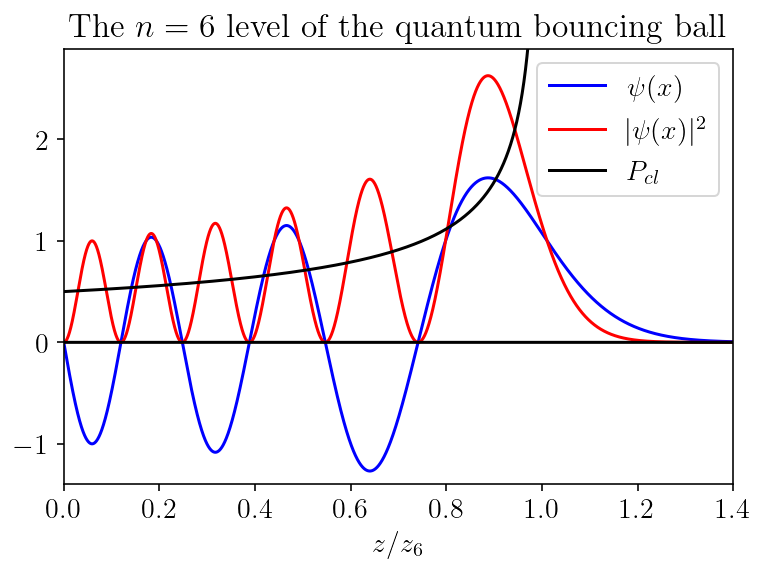

In [3]:
n = 6     # This is the number of nodes in the wavefunction

# Set up plot range
x = np.linspace(0, 1.4, num=4096, endpoint=True)
# Calculate wavefunctions
Ai = sp.airy((1.-x)*sp.ai_zeros(n)[0][n-1])[0] \
    /abs(sp.ai_zeros(n)[2][n-1])
# Square the wavefunction to get the probability density
Aisq = Ai**2

# Set plot boundaries
xmin = min(x)
xmax = max(x)
ymin = min(Ai)*1.1
ymax = max(max(Ai),max(Aisq))*1.1

# Set up the plot of the classical probability distribution
xamp = 1.-(2.*ymax)**(-2)
xcl = np.linspace(0, xamp, num=4096, endpoint=True)
pcl = 0.5*(1.-xcl)**(-.5)


# Plot the things!
plt.figure()
plt.plot(x, Ai, 'b-', x, Aisq, 'r-', xcl, pcl, 'k-', x, 0*x, 'k-')
plt.legend(['$\psi(x)$', '$|\psi(x)|^2$', '$P_{cl}$'], loc='best')
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.xlabel('$z/z_{%0d}$' % n)
# plt.ylabel('')
plt.title('The $n = %0d$ level of the quantum bouncing ball' % n);
# plt.savefig('fig/airywavefcn%03dplot.svg' % n)

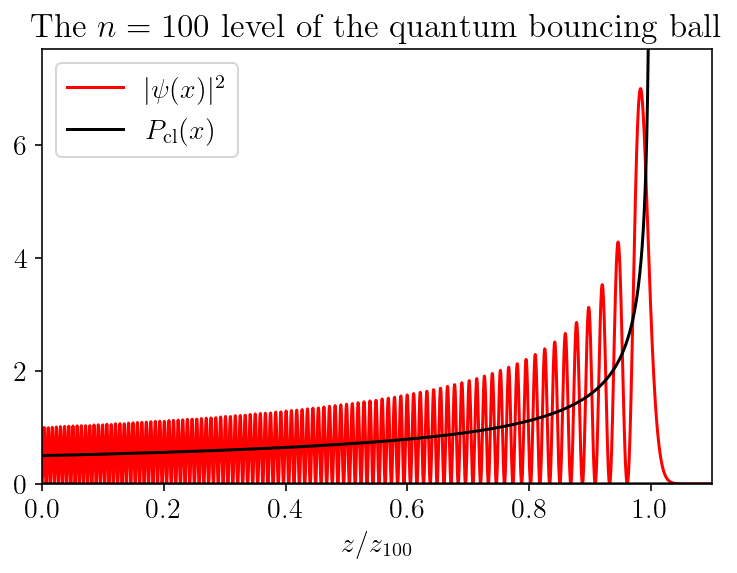

In [4]:
n = 100   # This is the number of nodes in the wavefunction

# Set up plot range
x = np.linspace(0, 4, num=8192, endpoint=True)
# Calculate wavefunctions
Ai = sp.airy((1.-x)*sp.ai_zeros(n)[0][n-1])[0] \
    /abs(sp.ai_zeros(n)[2][n-1])
# Square the wavefunction to get the probability density
Aisq = Ai**2

xmin = min(x)
xmax = max(x)
ymin = 0
ymax = max(Aisq)*1.1

# Set up the plot of the classical probability distribution
xamp = 1.-(2.*ymax)**(-2)
xcl = np.linspace(0, xamp, num=4096, endpoint=True)
pcl = 0.5*(1.-xcl)**(-.5)

# Plot the things!
plt.figure()
plt.plot(x, Aisq, 'r-', xcl, pcl, 'k-', x, 0*x, 'k-')
plt.legend(['$|\psi(x)|^2$', '$P_\mathrm{cl}(x)$'], loc='best')
plt.xlim([xmin,1.1])
plt.ylim([ymin,ymax])
plt.xlabel('$z/z_{%0d}$' % n)
# plt.ylabel('')
plt.title('The $n = %0d$ level of the quantum bouncing ball' % n);
# plt.savefig('airyprob%03dplot.svg' % n)

We can also explore the symmetric linear potential well, $V(z) = mg |z|$. The boundary condition at $x = 0$ no longer applies; however, since the potential is even, the energy eigenstates must be either even or odd functions of $x$ (see, e.g., Griffiths Problem 2.1, part c). For odd eigenfunctions, $\psi(0) = 0$, which matches the eigenfunctions of the bouncing ball. Along with the fact that $\psi_\mathrm{odd}(-z) = -\psi_\mathrm{odd}(z)$, we can construct the odd eigenfunctions of symmetric linear potential.

For the even wavefunctions, we know that $\psi(-x) = \psi(x)$. Since the potential has no jump discontinuities, we know that $\psi'(x)$ must be continuous. For this to be true at $x = 0$, we require that $\psi'(0) = 0$. This means that $\psi(0) = N_\mathrm{even} \operatorname{Ai}(\xi'_n)$, where $\xi'_n$ is the n<sup>th</sup> zero of $\operatorname{Ai}'(x)$,

\\[
N_\mathrm{even} = \left[\sqrt{-2z_0 \xi'_n}\operatorname{Ai}(\xi'_n)\right]^{-1}
\\]

is the normalization constant, and the energies are given by $E_n = -mgz_0\,\xi'_n$. Below, a piecewise wavefunction is defined which returns either the odd case or the even case.

In [5]:
# This function sets the classical turning point to x = 1.
def AiOdd(x, n):
    return np.piecewise(x, [x > 0, x <= 0], \
        [lambda x:  2**(-.5)*sp.airy((1. - x) * sp.ai_zeros(n+1)[0][n])[0] / abs(sp.ai_zeros(n+1)[2][n]), \
         lambda x: -2**(-.5)*sp.airy((1. + x) * sp.ai_zeros(n+1)[0][n])[0] / abs(sp.ai_zeros(n+1)[2][n])])

# This function sets the classical turning point to x = 1.
def AiEven(x, n):
    return np.piecewise(x, [x > 0, x <= 0], \
        [lambda x: 2**(-.5)*sp.airy((1. - x) * sp.ai_zeros(n+1)[1][n])[0] / abs(sp.ai_zeros(n+1)[2][n]), \
         lambda x: 2**(-.5)*sp.airy((1. + x) * sp.ai_zeros(n+1)[1][n])[0] / abs(sp.ai_zeros(n+1)[2][n])])

def AiWF(x, n):
    """Returns the wavefunction solution to the symmetric linear potential with n nodes. 
       The classical turning point occurs at x = 1."""
    if n % 2 == 1:
        return AiOdd(x, n//2)
    else:
        return AiEven(x, n//2)

def lin_pot_energies(n):
    if n % 2 == 1:
        return -sp.ai_zeros(n//2 + 1)[0][n//2]
    else:
        return -sp.ai_zeros(n//2 + 1)[1][n//2]

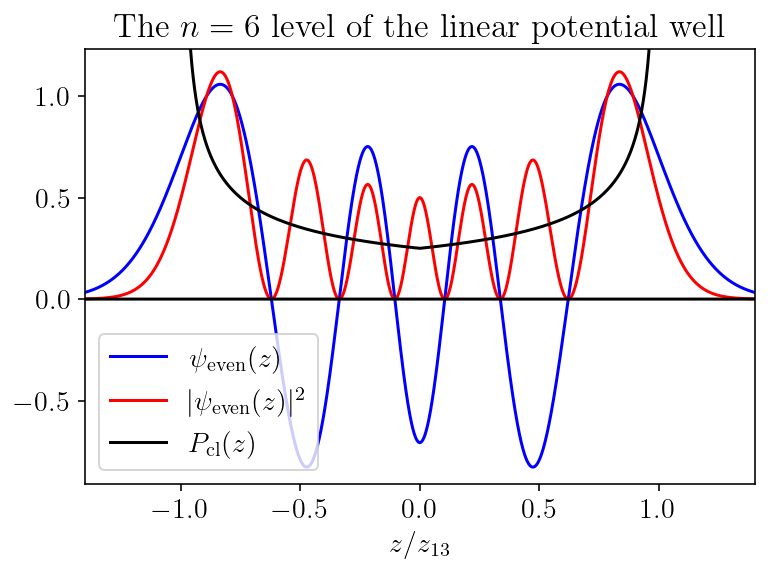

In [6]:
x = np.linspace(-1.4, 1.4, num=2**11)

# Set up wavefunction
n = 6 # number of nodes in wavefunction
psi = AiWF(x, n)

# Set plot boundaries
xmin = min(x)
xmax = max(x)
ymin = min(psi)*1.1
ymax = max(max(psi), max(psi**2))*1.1

# Set up the plot of the classical probability distribution
xamp = 1.-(4.*ymax)**(-2)
xcl = np.linspace(-xamp, xamp, num=2**11, endpoint=True)
pcl = 0.25*(1.-abs(xcl))**(-.5)

# Plot the things!
plt.figure()
plt.plot(x, psi, 'b-', x, psi**2, 'r-', xcl, pcl, 'k-', x, 0*x, 'k-')
if n % 2 == 1:
    plt.legend(['$\psi_\mathrm{odd}(z)$',\
            '$|\psi_\mathrm{odd}(z)|^2$', '$P_\mathrm{cl}(z)$'], loc='best')
else:
    plt.legend(['$\psi_\mathrm{even}(z)$',\
            '$|\psi_\mathrm{even}(z)|^2$', '$P_\mathrm{cl}(z)$'], loc='best')

plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.xlabel('$z/z_{%0d}$' % (2*n+1))
# plt.ylabel('')
plt.title('The $n = %0d$ level of the linear potential well' % n);
# plt.savefig('linearwavefcn%0dplot.svg' % (2*n+1))

Knowing that the energies are

$$
E_n = mg z_0
\begin{cases}
-\xi_{(n-1)/2} & \quad n \text{ odd} \\
-\xi'_{n/2} & \quad n \text{ even}
\end{cases}
$$

we can construct a plot of the probability densities superimposed on the potential energy function.

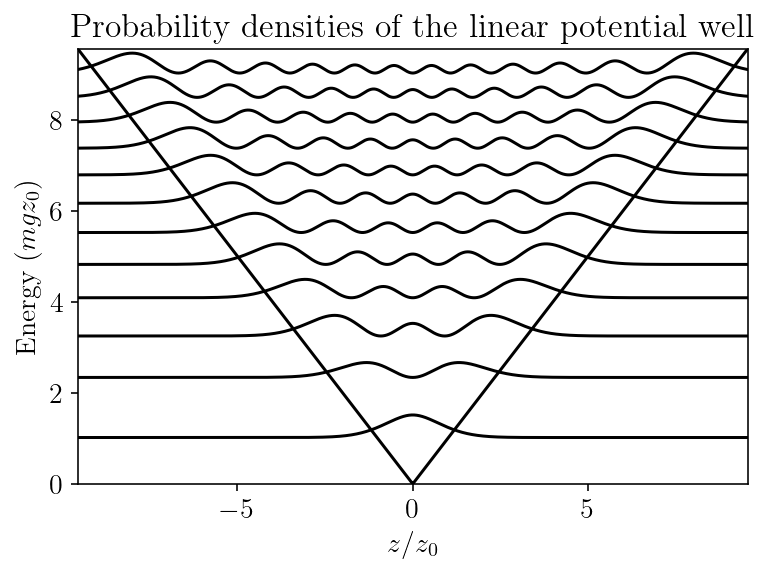

In [7]:
x = np.linspace(-9.55, 9.55,  num=2**11, endpoint=True)
xmax = max(x)
xmin = min(x)
ymin = 0
ymax = xmax

# Plot the things!
plt.figure()
for n in range(12):
    plt.plot(x, AiWF(x/lin_pot_energies(n),n)**2/lin_pot_energies(n)**.5 + lin_pot_energies(n), 'k-')
plt.plot(x, abs(x), 'k-')
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.xlabel('$z/z_0$')
plt.ylabel('Energy ($mgz_0$)')
plt.title('Probability densities of the linear potential well');
# plt.savefig('linearwellplot.svg')

We can also plot the states of the quantum bouncing ball.

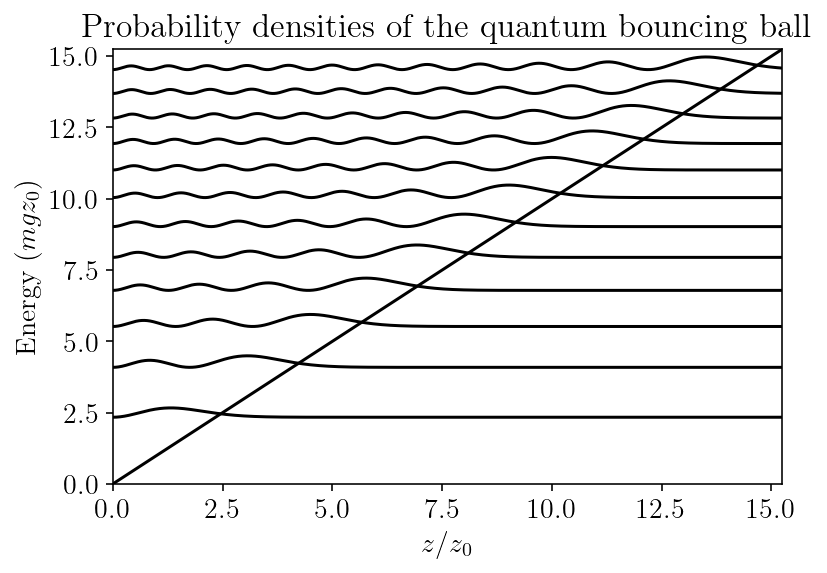

In [8]:
x = np.linspace(0, 15.25,  num=2**11, endpoint=True)
xmax = max(x)
xmin = min(x)
ymin = 0
ymax = xmax

# Plot the things!
plt.figure()
for n in range(13):
    plt.plot(x, AiWF(x/lin_pot_energies(2*n+1), 2*n+1)**2/lin_pot_energies(2*n+1)**0.5 + lin_pot_energies(2*n+1), 'k-')
plt.plot(x, abs(x), 'k-')
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.xlabel('$z/z_0$')
plt.ylabel('Energy ($mgz_0$)')
plt.title('Probability densities of the quantum bouncing ball');
# plt.savefig('quantumballplot.svg')